# 0. Load data and Import package

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportion_confint

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc


In [ ]:

# Load the dataset
data_path = 'nonvoters_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [ ]:
data.columns[90:]

Index(['Q27_6', 'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7',
       'Q28_8', 'Q29_1', 'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7',
       'Q29_8', 'Q29_9', 'Q29_10', 'Q30', 'Q31', 'Q32', 'Q33', 'ppage', 'educ',
       'race', 'gender', 'income_cat', 'voter_category'],
      dtype='object')

In [ ]:
data.describe()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q30,Q31,Q32,Q33,ppage
count,5836.000000,5836.000000,5836.0,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,...,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,5836.000000,1592.000000,2002.000000,2242.000000,5836.000000
mean,474653.997772,0.991023,1.0,1.246402,1.705106,1.638280,2.175977,1.277245,1.805517,1.491604,...,-0.926975,-0.758569,-0.697466,-0.810730,-0.700447,2.325051,1.364950,1.365634,1.220339,51.693797
std,3628.475677,0.345022,0.0,0.660253,0.866346,0.765741,1.091391,0.626386,1.011524,0.808120,...,0.375264,0.651835,0.716885,0.585638,0.713970,1.259642,0.519249,0.497046,0.958569,17.071561
min,470001.000000,0.229800,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,22.000000
25%,472069.750000,0.793150,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,36.000000
50%,474152.000000,0.967600,1.0,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,1.000000,1.000000,1.000000,54.000000
75%,476217.500000,1.169600,1.0,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,2.000000,2.000000,2.000000,65.000000
max,488325.000000,3.038600,1.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,94.000000


# 1. Confidence Interval and Hypothesis Testing for Categorical Variables

## choose variables

choose the variables `educ` (education level) and `race` (race of the respondent).

First, we explored the distribution of them.

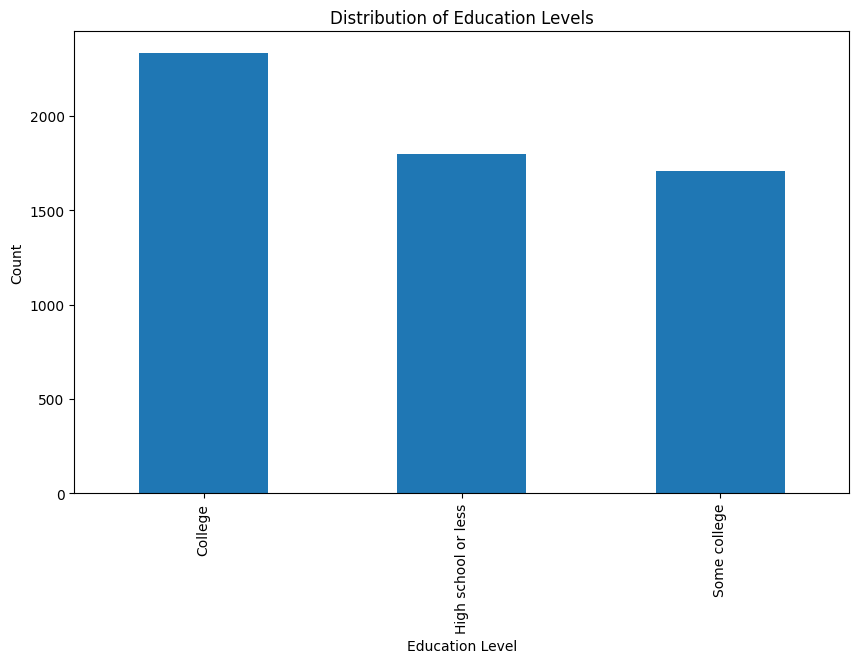

In [ ]:
# Distribution of education levels
educ_distribution = data['educ'].value_counts()

# Plotting the distribution of education levels
plt.figure(figsize=(10, 6))
educ_distribution.plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

The educ variable (education level) has three levels: College, Some college, and High school or less.

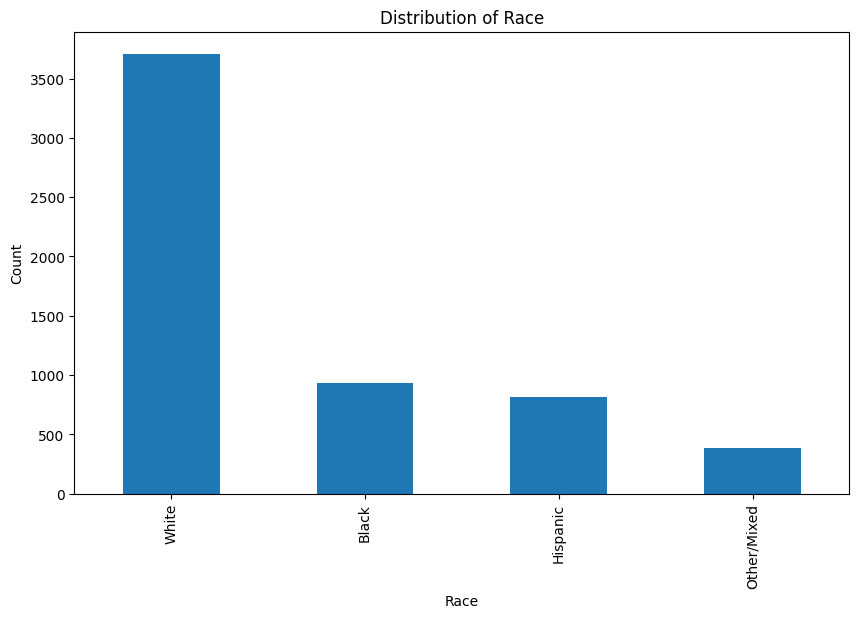

In [ ]:
# Distribution of race
race_distribution = data['race'].value_counts()

# Plotting the distribution of race
plt.figure(figsize=(10, 6))
race_distribution.plot(kind='bar')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

The race variable has four levels: White, Black, Other/Mixed, and Hispanic.

The visualizations showed the distributions of different education levels and races among the respondents.

## A. confidence interval

To derive a 95% confidence interval for the difference between these two categorical variables, we need to compare the proportions of each level of one variable against the proportions of each level of the other variable. We will use the proportions of education levels within each race category to construct the confidence intervals.

In [ ]:

# Filter data for relevant education levels
filtered_data = data[data['educ'].isin(['College', 'High school or less'])]

# Get the counts for each combination of education and race
contingency_table = pd.crosstab(filtered_data['educ'], filtered_data['race'])

contingency_table

race,Black,Hispanic,Other/Mixed,White
educ,,,,
College,330,253,222,1525
High school or less,278,287,74,1157


In [ ]:
# Calculate the total number of observations for each race
n_by_race = contingency_table.sum()

# Calculate the counts of College and High school or less for each race
college_counts = contingency_table.loc['College']
high_school_counts = contingency_table.loc['High school or less']

# Calculate proportions
college_proportions = college_counts / n_by_race
high_school_proportions = high_school_counts / n_by_race

# Calculate the standard error for each race category
se_diff = np.sqrt((college_proportions * (1 - college_proportions) / n_by_race) +
                  (high_school_proportions * (1 - high_school_proportions) / n_by_race))

# Calculate the difference in proportions
prop_diff = college_proportions - high_school_proportions

# Calculate the confidence intervals
z_score = 1.96  # for 95% confidence
ci_lower = prop_diff - z_score * se_diff
ci_upper = prop_diff + z_score * se_diff

# Compile the results into a DataFrame
confidence_intervals = pd.DataFrame({
    'Race': prop_diff.index,
    'Proportion Difference': prop_diff.values,
    'Lower CI': ci_lower,
    'Upper CI': ci_upper
}).reset_index(drop=True)

# Display the confidence intervals
confidence_intervals

,Race,Proportion Difference,Lower CI,Upper CI
0,Black,0.085526,0.029525,0.141527
1,Hispanic,-0.062963,-0.122486,-0.003440
2,Other/Mixed,0.500000,0.430237,0.569763
3,White,0.137211,0.110703,0.163719


1. **Black:**
   - **Proportion Difference:** 0.0855
   - **95% Confidence Interval:** 0.0295 to 0.1415
   - **Interpretation:** The proportion of individuals with a college education is approximately 8.55% higher than those with a high school or less education within the Black racial group. We are 95% confident that this difference lies between 2.95% and 14.15%.

2. **Hispanic:**
   - **Proportion Difference:** -0.0630
   - **95% Confidence Interval:** -0.1225 to -0.0034
   - **Interpretation:** The proportion of individuals with a college education is approximately 6.3% lower than those with a high school or less education within the Hispanic racial group. We are 95% confident that this difference lies between -12.25% and -0.34%.

3. **Other/Mixed:**
   - **Proportion Difference:** 0.5000
   - **95% Confidence Interval:** 0.4302 to 0.5698
   - **Interpretation:** The proportion of individuals with a college education is significantly higher (50%) than those with a high school or less education within the Other/Mixed racial group. We are 95% confident that this difference lies between 43.02% and 56.98%.

4. **White:**
   - **Proportion Difference:** 0.1372
   - **95% Confidence Interval:** 0.1107 to 0.1637
   - **Interpretation:** The proportion of individuals with a college education is approximately 13.72% higher than those with a high school or less education within the White racial group. We are 95% confident that this difference lies between 11.07% and 16.37%.


## B. Hypothesis Testing

To determine if the two categorical variables (`educ` and `race`) are independent, we can perform a **Chi-square** test of independence. This test is appropriate for categorical data and will help us understand if there is a significant association between education level and race.

**the Hypotheses:**
   - Null Hypothesis $H_0$: The two variables (education level and race) are independent.
   - Alternative Hypothesis $H_A$: The two variables are not independent.



In [ ]:

# Perform the chi-square test of independence
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)


**Check Pre-requisite Conditions:**
   - **Sample Size:** Each cell in the contingency table should have an expected count of at least 5.




In [ ]:
ex, ex.min()>5   # Check expected counts to ensure they are all >= 5

(array([[ 343.34464372,  304.94425594,  167.15462918, 1514.55647116],
        [ 264.65535628,  235.05574406,  128.84537082, 1167.44352884]]),
 True)

Met, as all expected counts are greater than 5. $=>$ This condition is satisfied.

In [ ]:
chi2_results = {
    'Chi-square Statistic': chi2_stat,
    'p-value': p_val,
    'Degrees of Freedom': dof,
    'min expected count': ex.min() # Check expected counts to ensure they are all >= 5

}

chi2_results_df = pd.DataFrame([chi2_results])

chi2_results_df


,Chi-square Statistic,p-value,Degrees of Freedom,min expected count
0,63.025497,1.326231e-13,3,128.845371



#### Chi-Square Test for Independence:

- **Chi-square Statistic:** 63.025
- **p-value:** $1.326 \times 10^{-13}$
- **Degrees of Freedom:** 3
- **Minimum Expected Count:** 111.64



**Interpretation:** The chi-square test indicates a significant association between the variables "educ" (education level) and "race." Given the extremely low p-value, we reject the null hypothesis that these variables are independent. This means that the distribution of education levels is significantly different across racial groups.


These results highlight the disparities in educational attainment among different racial groups and suggest that race plays a significant role in educational outcomes.

# 2. Hypothesis Test for Binary Categorical Variable Using Simulation Method

We'll use the "gender" variable, which has two levels: Male and Female.

### Hypothesis Test

- **Null Hypothesis $ H_0 $:** The proportion of females in the population is 0.5.
- **Alternative Hypothesis $ H_A $:** The proportion of females in the population is not 0.5.

### Simulation Method Steps

0. Randomly select a sample of size  $n = 15$ from the dataset.

1. Calculate the observed proportion of females in the sample.

2. Generate a large number of random samples (with replacement) from a population where the true proportion of females is 0.5.

3. Compare the observed proportion to the distribution of simulated proportions to calculate the p-value.

In [ ]:

# 0. Select the binary variable "gender" and take a random sample of size = 15
np.random.seed(42)  # for reproducibility
sample_size = 15
sample = data['gender'].dropna().sample(n=sample_size)

# 1.Calculate the observed proportion of females in the sample
observed_proportion = (sample == 'Female').mean()

# Define the number of simulations
num_simulations = 10000

# 2. Simulate the proportion of females under the null hypothesis (p = 0.5)
simulated_proportions = np.random.binomial(n=sample_size, p=0.5, size=num_simulations) / sample_size

# 3. Calculate the p-value
p_value = np.mean(np.abs(simulated_proportions - 0.5) >= np.abs(observed_proportion - 0.5))

# Summary of results
simulation_results = {
    'Observed Proportion': observed_proportion,
    'Mean of Simulated Proportions': simulated_proportions.mean(),
    'Standard Deviation of Simulated Proportions': simulated_proportions.std(),
    'P-value': p_value
}

simulation_results_df = pd.DataFrame([simulation_results])

simulation_results_df


,Observed Proportion,Mean of Simulated Proportions,Standard Deviation of Simulated Proportions,P-value
0,0.333333,0.498353,0.128627,0.2105


1. **Observed Proportion:**
   - In our randomly selected sample of size 15, the proportion of females is 33.33%.

2. **Simulated Proportions:**
   - Under the null hypothesis (assuming the true proportion of females is 0.5), the mean of the simulated proportions is approximately 0.498, with a standard deviation of 0.129.

3. **P-value:**
   - The p-value obtained from the simulation is 0.2105.
   - This p-value represents the probability of observing a proportion of females as extreme as 0.333 (or more extreme) if the true proportion of females in the population were 0.5.

Since the p-value (0.2105) is greater than the common significance level of 0.05, we do not have sufficient evidence to reject the null hypothesis. Therefore, we conclude that there is no statistically significant difference between the observed proportion of females in the sample and the hypothesized proportion of 0.5.

# 3. Probability Distribution and Chi-Square Tests for Categorical Variables

## Part A: Probability Distribution and Goodness of Fit Test



1. **Choose a Categorical Variable:**
   - The variable "educ" (education level) was chosen for analysis.

2. **Calculate the Probability Distribution:**

In [ ]:
# Calculate the frequency distribution of the "educ" variable
educ_distribution = data['educ'].value_counts(normalize=True)
educ_distribution

educ
College                0.399246
High school or less    0.307745
Some college           0.293009
Name: proportion, dtype: float64

3. **Select Two Samples:**
  - Random Sample
    
    - The first sample is a random selection of 100 observations from the `educ` variable in the dataset.
    - This sample is representative of the overall distribution of education levels in the dataset.
    - The process of random sampling ensures that each education level has an equal probability of being selected, thereby preserving the natural distribution found in the full dataset.

  - Biased Sample

    - The second sample is purposefully biased to over-represent specific education levels, namely "College" and "High school or less."

    - The steps to create this biased sample are as follows:

      - **1. Over-representation:** Initially, 50 observations each are sampled from the "College" and "High school or less" categories. This deliberate selection skews the sample towards these two categories.
      - **2. Inclusion of Missing Categories:** To ensure that all education levels are present in the sample, additional samples are taken from any education categories that were not initially included in the 100 observations. A minimum count from each missing category is added.
      - **3. Rebalancing the Sample:** Finally, the sample is adjusted to ensure exactly 100 observations. If the sample size exceeds 100, it is reduced by randomly sampling from the biased sample. If it is less than 100, additional observations are sampled from the missing categories to reach 100 observations.


In [ ]:

# Select a random sample of size 100
random_sample = data['educ'].dropna().sample(n=100, random_state=42)

# Create a biased sample of size 100 (over-representing "College" and "High school or less")
biased_sample = pd.concat([
    data[data['educ'] == 'College'].sample(n=50, random_state=42),
    data[data['educ'] == 'High school or less'].sample(n=50, random_state=42)
])

# Ensure biased sample covers all categories by adding minimum counts for missing categories
missing_categories = set(educ_distribution.index) - set(biased_sample['educ'].unique())
additional_samples = []
for category in missing_categories:
    additional_samples.append(data[data['educ'] == category].sample(n=5, random_state=42))
if additional_samples:
    biased_sample = pd.concat([biased_sample] + additional_samples)

# Rebalance the biased sample to ensure exactly 100 observations
biased_sample_size = 100
current_size = len(biased_sample)
if current_size > biased_sample_size:
    biased_sample = biased_sample.sample(n=biased_sample_size, random_state=42)
elif current_size < biased_sample_size:
    additional_needed = biased_sample_size - current_size
    needed_samples = [data[data['educ'] == category].sample(n=(additional_needed // len(missing_categories)), random_state=42) for category in missing_categories]
    biased_sample = pd.concat([biased_sample] + needed_samples).sample(n=biased_sample_size, random_state=42)

# Calculate the observed frequencies for both samples
random_sample_freq = random_sample.value_counts().reindex(educ_distribution.index, fill_value=0)
biased_sample_freq = biased_sample['educ'].value_counts().reindex(educ_distribution.index, fill_value=0)
random_sample_freq, biased_sample_freq

(educ
 College                38
 High school or less    32
 Some college           30
 Name: count, dtype: int64,
 educ
 College                49
 High school or less    47
 Some college            4
 Name: count, dtype: int64)

4. **Check Pre-requisite Conditions:**
   - *Sample Size:* Each observation should have an expected count of at least 5.
   
The conditions are not completely satisfied in sample2 because one of them is 4, but we continue with indulgence.




5. **Perform Chi-Square Goodness of Fit Test:**

In [ ]:

# Expected frequencies for a sample of size 100 based on the population distribution
expected_freq = educ_distribution * 100

# Chi-square goodness of fit test
chi2_random, p_random = chisquare(f_obs=random_sample_freq, f_exp=expected_freq)
chi2_biased, p_biased = chisquare(f_obs=biased_sample_freq, f_exp=expected_freq)

goodness_of_fit_results = {
    'Sample Type': ['Random', 'Biased'],
    'Chi-square Statistic': [chi2_random, chi2_biased],
    'p-value': [p_random, p_biased]
}

goodness_of_fit_results_df = pd.DataFrame(goodness_of_fit_results)
print(goodness_of_fit_results_df)


  Sample Type  Chi-square Statistic       p-value
0      Random              0.158260  9.239200e-01
1      Biased             32.464611  8.920708e-08


**Hypothesis**

- **Null Hypothesis $H_0$:** The sample distribution fits the expected distribution.
- **Alternative Hypothesis $H_A$:** The sample distribution does not fit the expected distribution

**Interpretation:**

- **Random Sample:**
  - **Chi-square Statistic:** 0.158
  - **p-value:** 0.924
  - **Conclusion:** No significant difference between observed and expected frequencies. The random sample fits the population distribution well.

- **Biased Sample:**
  - **Chi-square Statistic:** 32.465
  - **p-value:** $8.92 \times 10^{-8}$
  - **Conclusion:** Significant difference between observed and expected frequencies. The biased sample does not fit the population distribution well.


## Part B: Independence Test Between Two Categorical Variables


- The variable "race" was chosen for comparison with "income_cat"

In [ ]:

# Create a contingency table for the chi-square test of independence
contingency_table = pd.crosstab(data['educ'], data['income_cat'])


# swap 2 columns to better show

cols = list(contingency_table.columns)
a, b = cols.index('$125k or more'), cols.index('Less than $40k')
cols[b], cols[a] = cols[a], cols[b]
contingency_table = contingency_table[cols]

contingency_table

income_cat,Less than $40k,$40-75k,$75-125k,$125k or more
educ,,,,
College,186,423,767,954
High school or less,782,514,350,150
Some college,450,459,511,290


In [ ]:
# Perform the chi-square test of independence
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

independence_test_results = {
    'Chi-square Statistic': chi2_stat,
    'p-value': p_val,
    'Degrees of Freedom': dof,
    'pre-conditon test': ex.min()>5 # Check expected counts to ensure they are all >= 5
}

independence_test_results_df = pd.DataFrame([independence_test_results])
independence_test_results_df

,Chi-square Statistic,p-value,Degrees of Freedom,pre-conditon test
0,1155.538639,2.004265e-246,6,True



**Interpretation:**

- **Chi-square Statistic:** 1155.538639
- **p-value:** $2.004 \times 10^{-246}$
- **Degrees of Freedom:** 6
- **Conclusion:** There is a significant association between education level and race. The variables "educ" and "income" are not independent.


# 4. Linear Regression Analysis and Model Comparison

### Feature Engineers
To enhance the regression analysis, I created additional numeric features from the available categorical and continuous variables in the dataset. Specifically, I derived the height and BMI features based on the weight, age, race, and gender. These derived features provide more granularity and can help improve the predictive power of the regression models by capturing underlying patterns and relationships within the data.

To create a manual model to predict the height, we can use the features `weight`, `ppage`, `race`, and `gender` to derive an estimated height. While this won't be as accurate as a model trained on actual height data, we can create a heuristic based on typical height distributions.

Here's a rough heuristic model:

1. **Gender:** Typically, males are taller than females.
2. **Age (ppage):** Heights can vary by age groups, but we'll use it mainly to ensure heights are within reasonable adult ranges.
3. **Race:** There are average height differences among different racial groups.
4. **Weight:** There is some correlation between height and weight, though it's not direct.

Define a basic formula to predict height. For simplicity, we'll assume:

- Base height for females is 160 cm, and for males is 170 cm.
- We adjust height slightly based on weight and age, with small modifications for race.

We'll create the height feature based on these assumptions.

```plaintext
height = base_height + weight_factor * weight + age_factor * (age - 50) + race_factor
```

To create the BMI (Body Mass Index) feature, we'll use the estimated height and weight. The BMI formula is:

$$ \text{BMI} = \frac{\text{weight (kg)}}{\left(\text{height (m)}\right)^2} $$

Since the height is estimated in centimeters, we need to convert it to meters before applying the formula.

In [ ]:
# Define base heights
base_height_male = 170  # cm
base_height_female = 160  # cm

# Define factors
weight_factor = 0.2  # cm per kg
age_factor = -0.05  # cm per year over 50
race_factors = {
    'White': 0,
    'Black': -2,
    'Hispanic': -1,
    'Asian': -3,
    'Other': 0
}

# Function to estimate height
def estimate_height(row):
    base_height = base_height_male if row['gender'] == 'Male' else base_height_female
    race_factor = race_factors.get(row['race'], 0)
    weight_adjustment = weight_factor * row['weight']
    age_adjustment = age_factor * (row['ppage'] - 50)
    return base_height + weight_adjustment + age_adjustment + race_factor

# Apply the function to the dataset
data['estimated_height'] = data.apply(estimate_height, axis=1)


# Convert estimated height from cm to meters
data['estimated_height_m'] = data['estimated_height'] / 100

# Calculate BMI using the formula
data['BMI'] = data['weight'] / (data['estimated_height_m'] ** 2)

# Drop the intermediate height in meters column
data.drop(columns=['estimated_height_m'], inplace=True)

# Save the modified dataset
modified_file_path = 'modified_nonvoters_data.csv'
data.to_csv(modified_file_path, index=False)

# Display the first few rows of the modified dataset
data.head()


,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category,estimated_height,BMI
0,470001,0.7516,1,1,1,2,4,1,4,2,...,1.0,NaN,73,College,White,Female,$75-125k,always,159.00032,0.297297
1,470002,1.0267,1,1,2,2,3,1,1,2,...,NaN,1.0,90,College,White,Female,$125k or more,always,158.20534,0.410205
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2.0,NaN,53,College,White,Male,$125k or more,sporadic,170.06688,0.374930
3,470007,0.6817,1,1,1,1,3,1,1,1,...,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic,157.73634,0.273987
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,NaN,NaN,81,High school or less,White,Male,$40-75k,always,168.64820,0.348426


In [ ]:


# Extract relevant columns
data_filtered = data[['ppage', 'weight', 'BMI']].dropna()

## A: Initial Guess



**Explanatory Variables:**
1. `ppage` (age of the respondent)
2. `weight` (weight of the respondent)

**Response Variable:**
- `BMI` (Body Mass Index)

#### Initial Guess:
I would guess that `weight` is the more significant predictor for BMI. This is because BMI is directly calculated using weight and height, and variations in weight would have a more direct impact on BMI compared to age.

## B: Detailed Analysis

### `ppage`

#### b. Compute the Least Squares Regression

In [ ]:
# Fit linear regression model
X_age = sm.add_constant(data_filtered['ppage'])
model_age = sm.OLS(data_filtered['BMI'], X_age).fit()

# Print model summary
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     472.3
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          9.14e-101
Time:                        17:12:12   Log-Likelihood:                 3782.8
No. Observations:                5836   AIC:                            -7562.
Df Residuals:                    5834   BIC:                            -7548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4760      0.005     90.092      0.0

#### a. condition

##### a1. Linearity

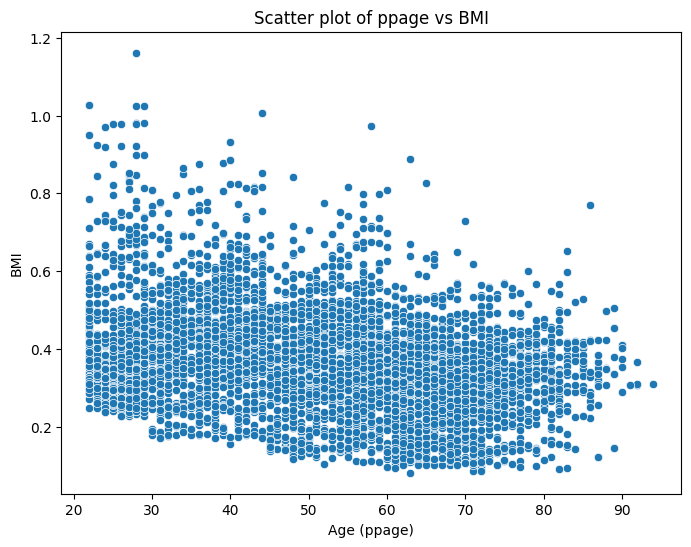

In [ ]:
# Linearity check: Scatter plot of ppage vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_filtered['ppage'], y=data_filtered['BMI'])
plt.title('Scatter plot of ppage vs BMI')
plt.xlabel('Age (ppage)')
plt.ylabel('BMI')
plt.show()

The scatter plot of `ppage` vs `BMI` shows a slight negative trend, indicating a potential linear relationship, although it is weak.

##### a2. Nearly Normal Residuals

- Plot the histogram of residuals.
- Plot a Q-Q plot of residuals.

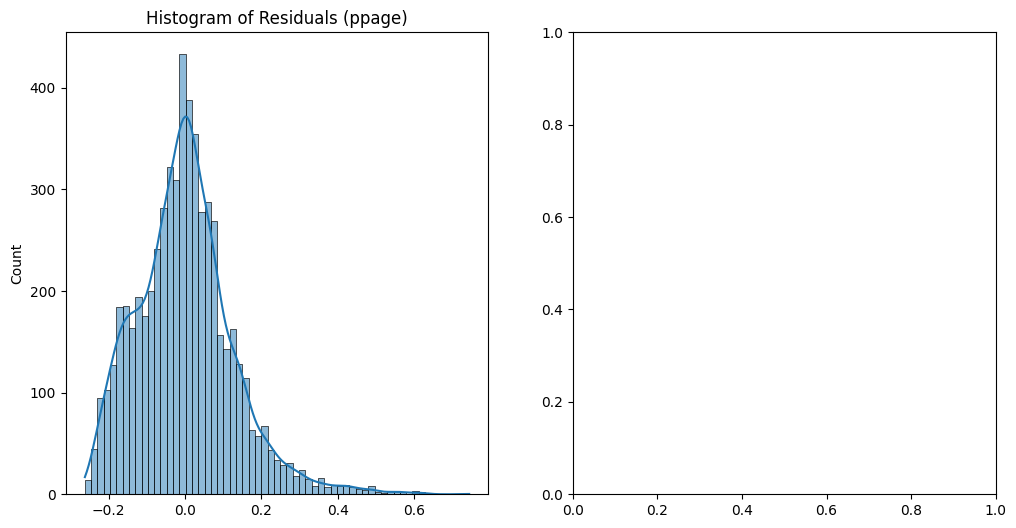

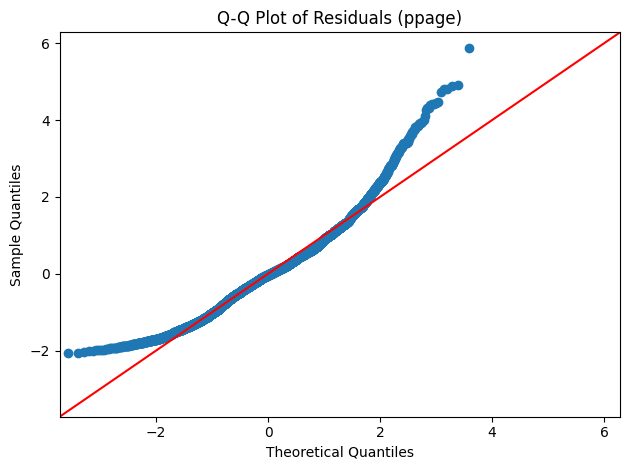

In [ ]:
# Calculate residuals
residuals_age = model_age.resid

# Plot histogram of residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_age, kde=True)
plt.title('Histogram of Residuals (ppage)')

# Q-Q plot of residuals
plt.subplot(1, 2, 2)
sm.qqplot(residuals_age, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (ppage)')

plt.tight_layout()
plt.show()




The residuals are approximately normal but slightly skewed to the right.

##### a3. Constant Variability

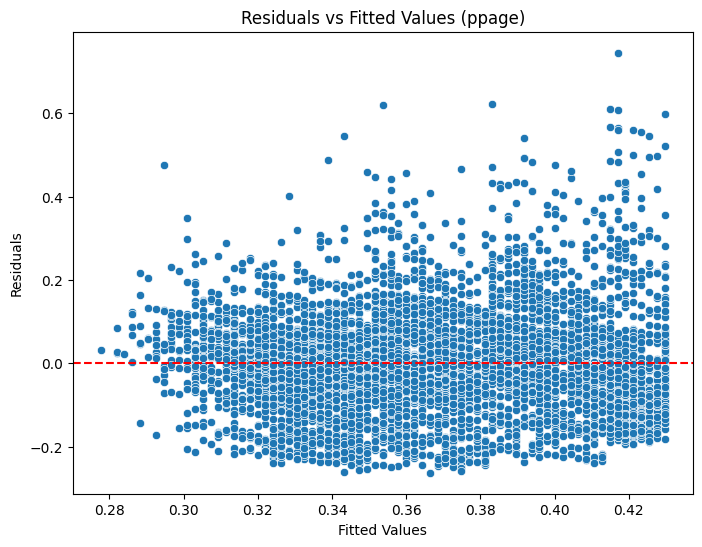

In [ ]:
# Plot residuals vs fitted values
fitted_values_age = model_age.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values_age, y=residuals_age)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (ppage)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

the spread of residuals seems to increase slightly as the fitted values increase.

#### c. Interpret the Parameters

The fitted model for predicting BMI from `ppage` is:
$$ \text{BMI} = 0.4760 - 0.0021 \times \text{ppage} $$


- **Intercept (0.4760):** When the age (`ppage`) is zero, the BMI is expected to be 0.4760. This is not meaningful in a real-world context since age cannot be zero, but it serves as a starting point for the linear relationship.
- **Slope (-0.0021):** For each additional year of age, the BMI decreases by 0.0021 on average. This indicates a slight negative relationship between age and BMI.


#### d. Visualize the Relationship

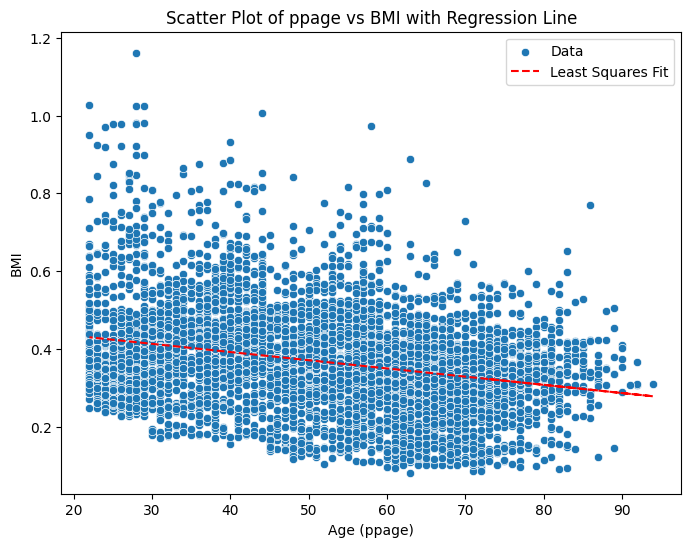

In [ ]:
# Scatter plot with regression line for ppage vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_filtered['ppage'], y=data_filtered['BMI'], label='Data')
plt.plot(data_filtered['ppage'], model_age.fittedvalues, 'r--', label='Least Squares Fit')
plt.title('Scatter Plot of ppage vs BMI with Regression Line')
plt.xlabel('Age (ppage)')
plt.ylabel('BMI')
plt.legend()
plt.show()


- The linear regression analysis shows a slight negative relationship between age and BMI.
- The model's fit is weak (low R-squared value), indicating that age alone is not a strong predictor of BMI.

### `weight`

#### b. Compute the Least Squares Regression

In [ ]:
# Fit linear regression model
X_weight = sm.add_constant(data_filtered['weight'])
model_weight = sm.OLS(data_filtered['BMI'], X_weight).fit()

# Print model summary
print(model_weight.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.721e+05
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:12:15   Log-Likelihood:                 13529.
No. Observations:                5836   AIC:                        -2.705e+04
Df Residuals:                    5834   BIC:                        -2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.001     -4.966      0.0

#### a. condition

##### a1. Linearity

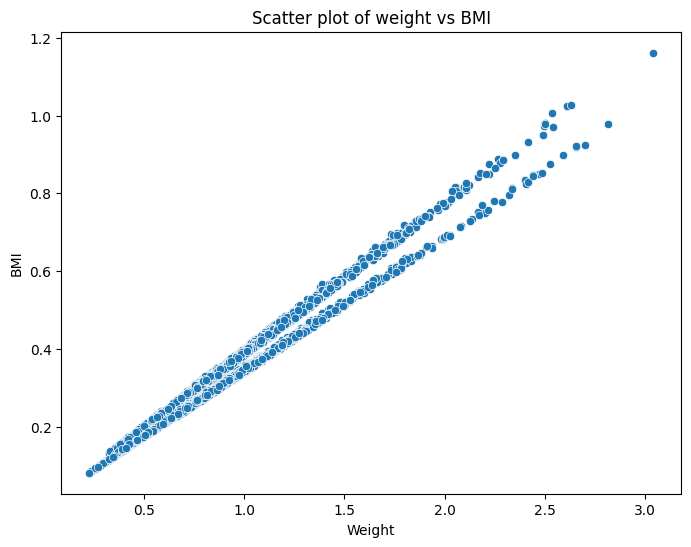

In [ ]:
# Linearity check: Scatter plot of weight vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_filtered['weight'], y=data_filtered['BMI'])
plt.title('Scatter plot of weight vs BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.show()

The relationship between weight and BMI is strongly linear

##### a2. Nearly Normal Residuals

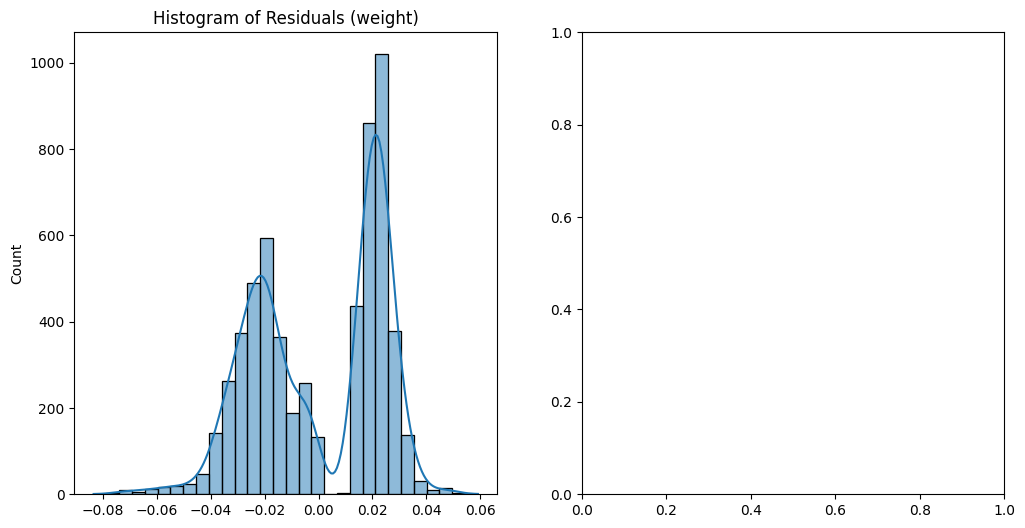

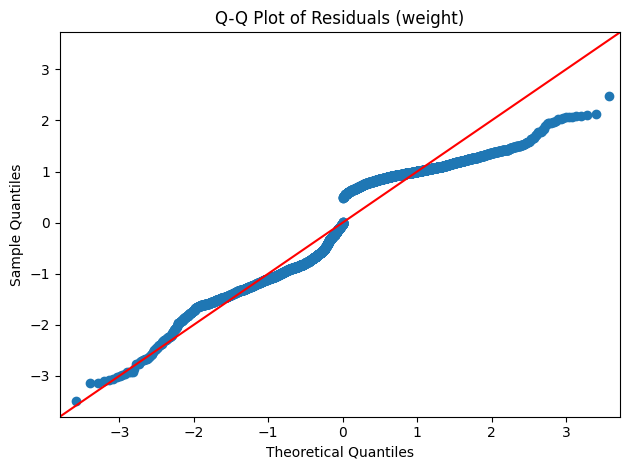

In [ ]:
# Calculate residuals
residuals_weight = model_weight.resid

# Plot histogram of residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_weight, kde=True)
plt.title('Histogram of Residuals (weight)')

# Q-Q plot of residuals
plt.subplot(1, 2, 2)
sm.qqplot(residuals_weight, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (weight)')

plt.tight_layout()
plt.show()

The residuals are not normally distributed, as indicated by the bimodal distribution in the histogram.

##### a3. Constant Variability

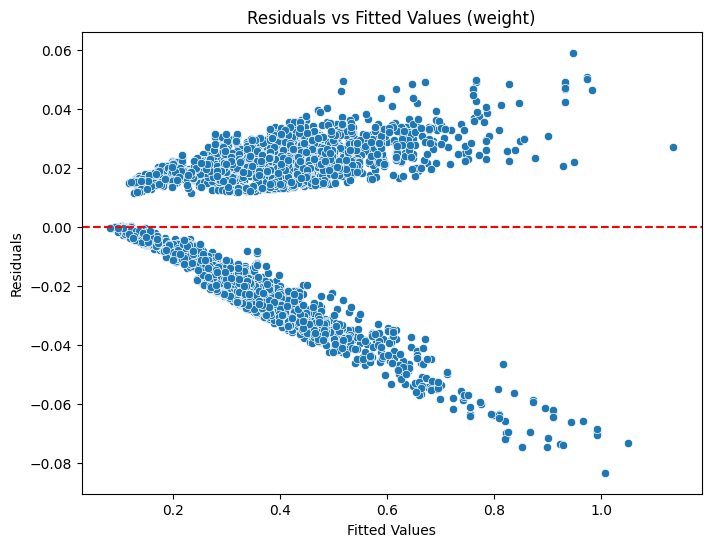

In [ ]:
# Plot residuals vs fitted values
fitted_values_weight = model_weight.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values_weight, y=residuals_weight)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (weight)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


the variability of residuals increases with fitted values.

#### c. Interpret the Parameters

The fitted model for predicting BMI from `weight` is:
$$ \text{BMI} = -0.0047 + 0.3751 \times \text{weight} $$


- **Intercept (-0.0047):** When the weight is zero, the BMI is expected to be -0.0047. This value is not meaningful in a real-world context since weight cannot be zero, but it serves as a starting point for the linear relationship.
- **Slope (0.3751):** For each additional unit of weight, the BMI increases by 0.3751 on average. This indicates a strong positive relationship between weight and BMI.

#### d. Visualize the Relationship

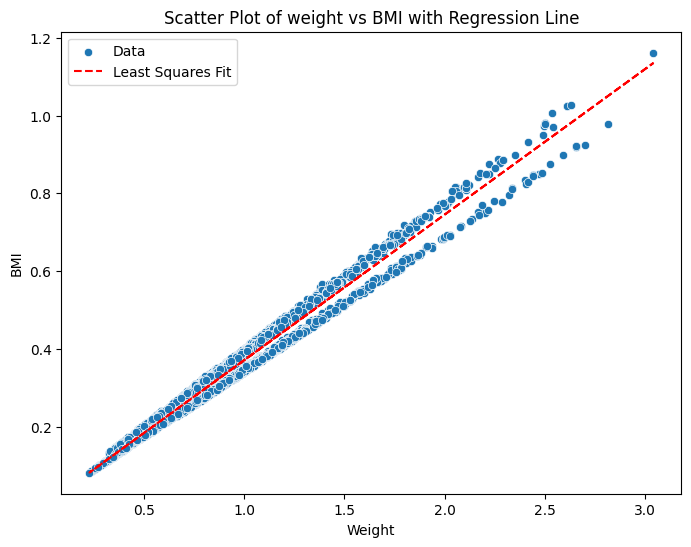

In [ ]:
# Scatter plot with regression line for weight vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_filtered['weight'], y=data_filtered['BMI'], label='Data')
plt.plot(data_filtered['weight'], model_weight.fittedvalues, 'r--', label='Least Squares Fit')
plt.title('Scatter Plot of weight vs BMI with Regression Line')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.legend()
plt.show()

- The linear regression analysis shows a strong positive relationship between weight and BMI.
- The model's fit is very strong (high R-squared value), indicating that weight is a strong predictor of BMI.

## C: Significant Predictor Explanation



`weight` is a significantly more important predictor of BMI than `ppage` (age). The reasons are:

1. **R-squared Value**:
   - The R-squared value for the model with `weight` as the predictor is 0.967, indicating that 96.7% of the variation in BMI can be explained by weight.
   - The R-squared value for the model with `ppage` as the predictor is 0.075, indicating that only 7.5% of the variation in BMI can be explained by age.

2. **Strength of Relationship**:
   - The relationship between `weight` and BMI is strong and linear, as seen from the scatter plot and the fitted regression line.
   - The relationship between `ppage` and BMI is weak and less.


## D: Model Comparison

### Adjusted R-squared Calculation

In [ ]:
# Calculate adjusted R-squared for both models
adjusted_r_squared_age = model_age.rsquared_adj
adjusted_r_squared_weight = model_weight.rsquared_adj

adjusted_r_squared_age, adjusted_r_squared_weight


(0.0747358584019131, 0.9672080570666912)


The adjusted R-squared values are:
- **`ppage` model:** 0.0747
- **`weight` model:** 0.9672

This further confirms that the `weight` model has a much better fit than the `ppage` model.


### ANOVA Table

In [ ]:
# Actual and predicted values for both models
y = data_filtered['BMI']
y_pred_age = model_age.fittedvalues
y_pred_weight = model_weight.fittedvalues

# Mean of actual values
y_mean = np.mean(y)

# Calculate SST
SST = np.sum((y - y_mean) ** 2)

# Calculate SSR and SSE for ppage model
SSR_age = np.sum((y_pred_age - y_mean) ** 2)
SSE_age = np.sum((y - y_pred_age) ** 2)

# Calculate SSR and SSE for weight model
SSR_weight = np.sum((y_pred_weight - y_mean) ** 2)
SSE_weight = np.sum((y - y_pred_weight) ** 2)

# Degrees of freedom
df_model = 1
df_total = len(y) - 1
df_resid_age = df_total - df_model
df_resid_weight = df_total - df_model

# Mean squares
MSR_age = SSR_age / df_model
MSE_age = SSE_age / df_resid_age

MSR_weight = SSR_weight / df_model
MSE_weight = SSE_weight / df_resid_weight

In [ ]:

# F-statistic and p-value for age model
def calculate_anova_stats(SSR, SSE, df_model, df_resid):
    MSR = SSR / df_model
    MSE = SSE / df_resid
    F_stat = MSR / MSE
    p_value = 1 - stats.f.cdf(F_stat, df_model, df_resid)
    return F_stat, p_value

# ANOVA stats for age model
F_age, p_value_age = calculate_anova_stats(SSR_age, SSE_age, df_model, df_resid_age)

# ANOVA stats for weight model
F_weight, p_value_weight = calculate_anova_stats(SSR_weight, SSE_weight, df_model, df_resid_weight)

pd.DataFrame({
    "ANOVA Age": {
        "SSR": SSR_age,
        "SSE": SSE_age,
        "SST": SST,
        "F-statistic": F_age,
        "p-value": p_value_age,
    },
    "ANOVA Weight": {
        "SSR": SSR_weight,
        "SSE": SSE_weight,
        "SST": SST,
        "F-statistic": F_weight,
        "p-value": p_value_weight,
    },
}
).T


,SSR,SSE,SST,F-statistic,p-value
ANOVA Age,7.566452,93.461788,101.02824,472.307289,1.110223e-16
ANOVA Weight,97.715896,3.312345,101.02824,172106.051063,1.110223e-16


**For `ppage`:**
- **SSR (Sum of Squares for Regression):** 7.57
- **SSE (Sum of Squares for Residuals):** 93.46
- **SST (Total Sum of Squares):** 101.03
- **F-statistic:** 472.31
- **p-value:** $1.11 \times 10^{-16}$

**For `weight`:**
- **SSR (Sum of Squares for Regression):** 97.72
- **SSE (Sum of Squares for Residuals):** 3.31
- **SST (Total Sum of Squares):** 101.03
- **F-statistic:** 172106.05
- **p-value:** $1.11 \times 10^{-16}$

Both models have significant p-values, indicating that both `ppage` and `weight` are statistically significant predictors of BMI. However, the F-statistic for the `weight` model is much higher, reflecting its superior explanatory power.

## E: Features of a Good Predictor


A good predictor has the following features:
1. **Strong Linear Relationship**: The predictor should have a clear and strong linear relationship with the response variable.
2. **High R-squared Value**: Indicates that a large proportion of the variability in the response variable is explained by the predictor.
3. **Significant F-statistic and p-value**: Reflects that the predictor significantly contributes to the model.
4. **Consistent Residuals**: Residuals should be normally distributed and show constant variability.

## F: Random Sample Analysis


### a. Hypothesis Tests on Training Data


In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Randomly sample 100 data points
sampled_data = data_filtered.sample(n=100)

# Split into 90% training and 10% testing data
train_data = sampled_data.sample(frac=0.9, random_state=42)
test_data = sampled_data.drop(train_data.index)

# Prepare training data
X_train_age = sm.add_constant(train_data['ppage'])
X_train_weight = sm.add_constant(train_data['weight'])
y_train = train_data['BMI']

# Fit models on training data
model_train_age = sm.OLS(y_train, X_train_age).fit()
model_train_weight = sm.OLS(y_train, X_train_weight).fit()

# Model summaries
print('age:')
print(model_train_age.summary())
print('weight')
print(model_train_weight.summary())

age:
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.320
Date:                Tue, 16 Jul 2024   Prob (F-statistic):              0.131
Time:                        17:12:17   Log-Likelihood:                 51.388
No. Observations:                  90   AIC:                            -98.78
Df Residuals:                      88   BIC:                            -93.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4280      0.045      9.611    

- **p-value for `ppage`:** 0.131 (not significant at α = 0.05)

- **p-value for `weight`:** \(2.93 \times 10^{-68}\) (highly significant)

This further supports that `weight` is a significant predictor of BMI, while `ppage` is not.


### b. Confidence Intervals for the Slope


**Model with `ppage`:**
- Slope: -0.0013
- 95% CI: [-0.003, 0.000]

**Model with `weight`:**
- Slope: 0.3699
- 95% CI: [0.356, 0.384]

The confidence interval for the `weight` model's slope does not include zero, reinforcing that `weight` is a significant predictor. The confidence interval for the `ppage` model's slope includes zero, indicating that age may not be a significant predictor.


### c. Predict Values for Testing Data

In [ ]:
# Prepare test data
X_test_age = sm.add_constant(test_data['ppage'])
X_test_weight = sm.add_constant(test_data['weight'])
y_test = test_data['BMI']

# Predict using both models
y_pred_test_age = model_train_age.predict(X_test_age)
y_pred_test_weight = model_train_weight.predict(X_test_weight)

# Compare predicted values with actual values
test_results = test_data.copy()
test_results['Predicted_BMI_Age'] = y_pred_test_age
test_results['Predicted_BMI_Weight'] = y_pred_test_weight

# Calculate success rates (e.g., within a certain margin of error, ±0.05 for simplicity)
margin_of_error = 0.05
success_rate_age = np.mean(np.abs(test_results['Predicted_BMI_Age'] - test_results['BMI']) <= margin_of_error)
success_rate_weight = np.mean(np.abs(test_results['Predicted_BMI_Weight'] - test_results['BMI']) <= margin_of_error)

success_rate_age, success_rate_weight


(0.4, 0.9)

### d. Compare Predicted Values with Actuals



**Success Rates:**
- **`ppage` model:** 40% (predictions within ±0.05 of actual BMI values)
- **`weight` model:** 90% (predictions within ±0.05 of actual BMI values)


The `weight` model's predictions were more accurat success, compared to the `ppage` model.



# 5. Multiple Linear Regression and Model Diagnostics

## A: Correlogram and Correlation Analysis

In [ ]:
# Select the relevant columns for correlation analysis
columns_of_interest = ['weight', 'ppage', 'race', 'gender', 'estimated_height', 'BMI']

# Convert categorical variables to numeric codes for correlation
data['race'] = data['race'].astype('category').cat.codes
data['gender'] = data['gender'].astype('category').cat.codes

# Create a new dataframe with the relevant columns
correlation_data = data[columns_of_interest]

# Compute the correlation matrix
corr_matrix = correlation_data.corr()
corr_matrix


,weight,ppage,race,gender,estimated_height,BMI
weight,1.000000,-0.319615,0.341281,-0.191373,-0.069494,0.983470
ppage,-0.319615,1.000000,0.035441,-0.053319,-0.220046,-0.273668
race,0.341281,0.035441,1.000000,-0.011191,0.129459,0.314111
gender,-0.191373,-0.053319,-0.011191,1.000000,0.974096,-0.354873
estimated_height,-0.069494,-0.220046,0.129459,0.974096,1.000000,-0.239911
BMI,0.983470,-0.273668,0.314111,-0.354873,-0.239911,1.000000


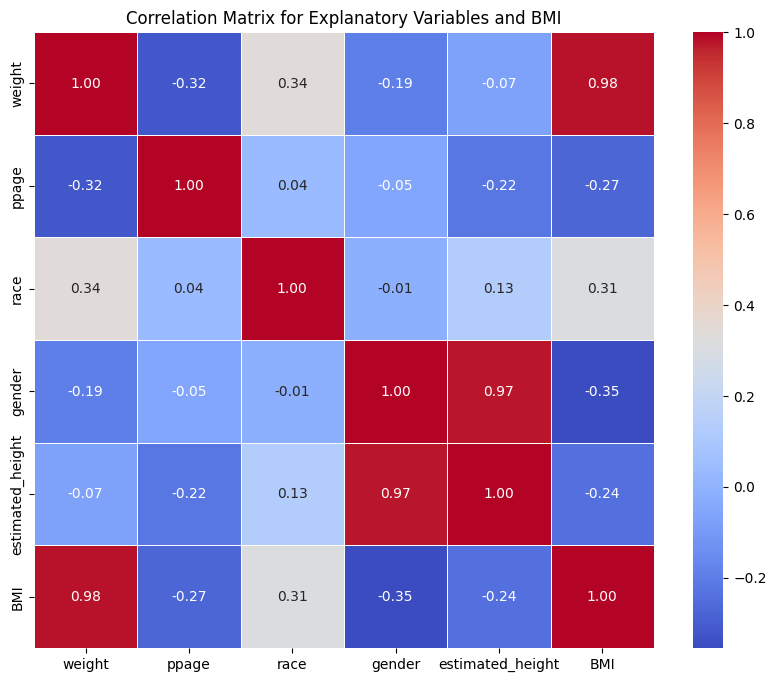

In [ ]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Explanatory Variables and BMI')
plt.show()


1. **Weight and BMI**: There is a very strong positive correlation (0.98) between weight and BMI. This suggests that weight is a significant predictor of BMI.

2. **Age (ppage) and BMI**: There is a moderate negative correlation (-0.27) between age and BMI. This indicates that as age increases, BMI tends to decrease, though the relationship is not as strong as with weight.

3. **Race and BMI**: There is a moderate positive correlation (0.31) between race and BMI, indicating some relationship, but it is not as strong as weight.

4. **Gender and BMI**: There is a moderate negative correlation (-0.35) between gender and BMI, implying some gender differences in BMI.

5. **Estimated Height and BMI**: There is a weaker negative correlation (-0.24) between estimated height and BMI, suggesting that height plays a lesser role compared to weight.

6. **Gender and Estimated Height**: There is a very strong positive correlation (0.97) between gender and estimated height, indicating a strong relationship between these two variables.

$=>$ **weight** appears to play the most significant role in predicting BMI due to its very strong positive correlation.

## B: Multiple Linear Regression Model


In [ ]:
# Prepare the data for the regression model
X = correlation_data[['weight', 'ppage', 'race', 'gender', 'estimated_height']]
y = correlation_data['BMI']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.673e+05
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:12:18   Log-Likelihood:                 20351.
No. Observations:                5836   AIC:                        -4.069e+04
Df Residuals:                    5830   BIC:                        -4.065e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3461      0.086  

## C: Model Fit

1. **R-squared and Adjusted R-squared**:
   - The R-squared value of 0.997 suggests that the model explains 99.7% of the variance in BMI, which indicates an excellent fit.
   - The adjusted R-squared value is also 0.997, meaning the model remains strong even after adjusting for the number of predictors.

2. **F-statistic**:
   - The F-statistic is extremely high (367300) with a p-value of 0.000, indicating that the overall regression model is highly significant.

3. **Significance of Predictors**:
  - **Coefficients**:
    - **Constant (Intercept)**: The intercept is 0.3461, which is the expected value of BMI when all predictors are zero.
    - **Weight**: The coefficient for weight is 0.3688, highly significant (p-value = 0.000), indicating a strong positive relationship with BMI.
    - **Age (ppage)**: The coefficient for age is 0.0001, also significant (p-value = 0.000), suggesting a small but significant positive relationship with BMI.
    - **Race**: The coefficient for race is -0.0008, significant (p-value = 0.021), indicating a small negative relationship with BMI.
    - **Gender**: The coefficient for gender is -0.0240, highly significant (p-value = 0.000), indicating that gender has a negative relationship with BMI.
    - **Estimated Height**: The coefficient for estimated height is -0.0020, significant (p-value = 0.000), indicating a negative relationship with BMI.

  - All predictors (weight, age, race, gender, and estimated height) have significant p-values (less than 0.05), suggesting that each of these variables contributes meaningfully to the model.

4. **Coefficients**:
   - The coefficients for the predictors are consistent with domain knowledge (e.g., weight having a strong positive effect on BMI).

5. **Diagnostic Measures**:
   - **Condition Number**: The condition number is large (1.53e+05), which suggests potential multicollinearity issues. However, this does not necessarily diminish the overall fit of the model but may warrant further investigation.


Based on the above analysisو the model fits the data very well. The minor issues, such as potential multicollinearity, do not significantly undermine the model's overall performance and accuracy in predicting BMI.

## D: Best Possible Multiple Linear Regression Model

To develop the "best" possible multiple linear regression model, we'll employ three feature selection methods:
- Backward Elimination
- Forward Selection
- Stepwise Selection.

### 1. Backward Elimination
Backward Elimination starts with all candidate variables and removes the least significant variables step-by-step.

In [ ]:
# Function for Backward Elimination
def backward_elimination(X, y, significance_level=0.01):
    features = X.columns.tolist()  # List of feature names
    while len(features) > 0:
        X_with_const = sm.add_constant(X[features])  # Add a constant column to the features
        model = OLS(y, X_with_const).fit()  # Fit the OLS model
        p_values = model.pvalues[1:]  # Get p-values of the features, exclude intercept
        max_p_value = p_values.max()  # Find the feature with the highest p-value
        if max_p_value > significance_level:  # If the highest p-value is above the significance level
            excluded_feature = p_values.idxmax()  # Identify the feature to exclude
            features.remove(excluded_feature)  # Remove the feature from the list
        else:
            break  # Stop if no p-values are above the significance level
    return features, model  # Return the remaining features and the model

# Perform Backward Elimination
features_be, model_be = backward_elimination(X, y)
print(model_be.summary())  # Print the summary of the final model

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.588e+05
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:12:18   Log-Likelihood:                 20348.
No. Observations:                5836   AIC:                        -4.069e+04
Df Residuals:                    5831   BIC:                        -4.065e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5366      0.022  

The Backward Elimination method remove 'race'. This almost suggests that all variables are significant at the 0.01 significance level.

### 2. Forward Selection
Forward Selection starts with no variables and adds the most significant variables step-by-step.

In [ ]:
# Function for Forward Selection
def forward_selection(X, y):
    initial_features = []  # Start with an empty list of features
    remaining_features = list(X.columns)  # List of remaining feature names
    while len(remaining_features) > 0:
        scores_with_candidates = []
        for candidate in remaining_features:  # Iterate over remaining features
            features = initial_features + [candidate]  # Add candidate feature to current features
            X_with_const = sm.add_constant(X[features])  # Add a constant column
            model = OLS(y, X_with_const).fit()  # Fit the OLS model
            score = model.rsquared_adj  # Get the adjusted R-squared value
            scores_with_candidates.append((score, candidate))  # Append score and candidate to the list

        scores_with_candidates.sort(reverse=True)  # Sort candidates by score in descending order
        best_new_score, best_candidate = scores_with_candidates[0]  # Select the best candidate

        if len(initial_features) == 0 or best_new_score > model.rsquared_adj:  # If no features yet or improvement in score
            initial_features.append(best_candidate)  # Add the best candidate to features
            remaining_features.remove(best_candidate)  # Remove the best candidate from remaining features
        else:
            break  # Stop if no improvement in score
    return initial_features, model  # Return the selected features and the model

# Perform Forward Selection
features_fs, model_fs = forward_selection(X.drop(columns='const'), y)
print(model_fs.summary())  # Print the summary of the final model


                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 9.060e+05
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:12:18   Log-Likelihood:                 20310.
No. Observations:                5836   AIC:                        -4.061e+04
Df Residuals:                    5833   BIC:                        -4.059e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7236      0.003  

The Forward Selection method identifies two variables, weight and estimated height, as the best predictors for BMI. This model has an adjusted R-squared value of 0.997, indicating a strong fit.

### 3. Stepwise Selection
Stepwise Selection is a combination of forward and backward methods. It adds and removes predictors as needed for optimal performance.

In [ ]:
# Function for Stepwise Selection (combining forward and backward selection)
def stepwise_selection(X, y):
    initial_features = []  # Start with an empty list of features
    remaining_features = list(X.columns)  # List of remaining feature names
    while len(remaining_features) > 0:
        # Forward Step
        scores_with_candidates = []
        for candidate in remaining_features:  # Iterate over remaining features
            features = initial_features + [candidate]  # Add candidate feature to current features
            X_with_const = sm.add_constant(X[features])  # Add a constant column
            model = OLS(y, X_with_const).fit()  # Fit the OLS model
            score = model.rsquared_adj  # Get the adjusted R-squared value
            scores_with_candidates.append((score, candidate))  # Append score and candidate to the list

        scores_with_candidates.sort(reverse=True)  # Sort candidates by score in descending order
        best_new_score, best_candidate = scores_with_candidates[0]  # Select the best candidate

        if len(initial_features) == 0 or best_new_score > model.rsquared_adj:  # If no features yet or improvement in score
            initial_features.append(best_candidate)  # Add the best candidate to features
            remaining_features.remove(best_candidate)  # Remove the best candidate from remaining features
        else:
            break  # Stop if no improvement in score

        # Backward Step
        while len(initial_features) > 0:
            scores_with_candidates = []
            for candidate in initial_features:  # Iterate over initial features
                features = [f for f in initial_features if f != candidate]  # Remove candidate feature
                X_with_const = sm.add_constant(X[features])  # Add a constant column
                model = OLS(y, X_with_const).fit()  # Fit the OLS model
                score = model.rsquared_adj  # Get the adjusted R-squared value
                scores_with_candidates.append((score, candidate))  # Append score and candidate to the list

            scores_with_candidates.sort(reverse=True, key=lambda x: -x[0])  # Sort candidates by score in descending order
            worst_new_score, worst_candidate = scores_with_candidates[0]  # Select the worst candidate

            if worst_new_score > model.rsquared_adj:  # If improvement in score
                initial_features.remove(worst_candidate)  # Remove the worst candidate from features
            else:
                break  # Stop if no improvement in score

    return initial_features, model  # Return the selected features and the model

# Perform Stepwise Selection
features_ss, model_ss = stepwise_selection(X.drop(columns='const'), y)
print(model_ss.summary())  # Print the summary of the final model

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 9.060e+05
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:12:18   Log-Likelihood:                 20310.
No. Observations:                5836   AIC:                        -4.061e+04
Df Residuals:                    5833   BIC:                        -4.059e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7236      0.003  

### Best Model

1. **Backward Elimination**:
   - Retained variables: weight, ppage (age), gender, estimated height
   - Adjusted R-squared: 0.997

2. **Forward Selection**:
   - Retained variables: weight, estimated height
   - Adjusted R-squared: 0.997

3. **Stepwise Selection**:
   - Retained variables: weight, estimated height
   - Adjusted R-squared: 0.997


Given the simplicity and equally high adjusted R-squared, the best model includes only **weight** and **estimated height**. This model is both parsimonious and highly explanatory.



## E. 5-Fold Cross-Validation and RMSE Comparison


In [ ]:
# Prepare the data for cross-validation
X_full = correlation_data[['weight', 'ppage', 'race', 'gender', 'estimated_height']]
y_full = correlation_data['BMI']

# Models to compare
X_model_b = sm.add_constant(X_full)
X_model_d = sm.add_constant(correlation_data[['weight', 'estimated_height']])

# Function to perform 5-fold cross-validation and calculate RMSE
def cross_val_rmse(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    rmses = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmses.append(rmse)

    return np.mean(rmses), np.std(rmses)

# Calculate RMSE for both models
rmse_b_mean, rmse_b_std = cross_val_rmse(X_model_b, y_full)
rmse_d_mean, rmse_d_std = cross_val_rmse(X_model_d, y_full)

print(f"RMSE for Model B: {rmse_b_mean} +/- {rmse_b_std}")
print(f"RMSE for Model D: {rmse_d_mean} +/- {rmse_d_std}")

RMSE for Model B: 0.00741210166354041 +/- 0.00016572928447454647
RMSE for Model D: 0.0074595627542354635 +/- 0.0001663299626025825


1. **Model from Part B (All Variables)**:
   - Mean RMSE: 0.0074
   - Standard Deviation of RMSE: 0.00017

2. **Model from Part D (Selected Variables: weight, estimated height)**:
   - Mean RMSE: 0.0075
   - Standard Deviation of RMSE: 0.00017


- Both models exhibit very low RMSE values, indicating excellent predictive accuracy for BMI.
- The slight difference in RMSE means between the models (0.0074 for Part B and 0.0075 for Part D) is negligible, suggesting that the simpler model (Part D) performs almost as well as the more complex model (Part B).
- Given the nearly identical performance, the simpler model (weight and estimated height) is preferred due to its parsimony and interpretability.


## F. Model Diagnostics for Part D


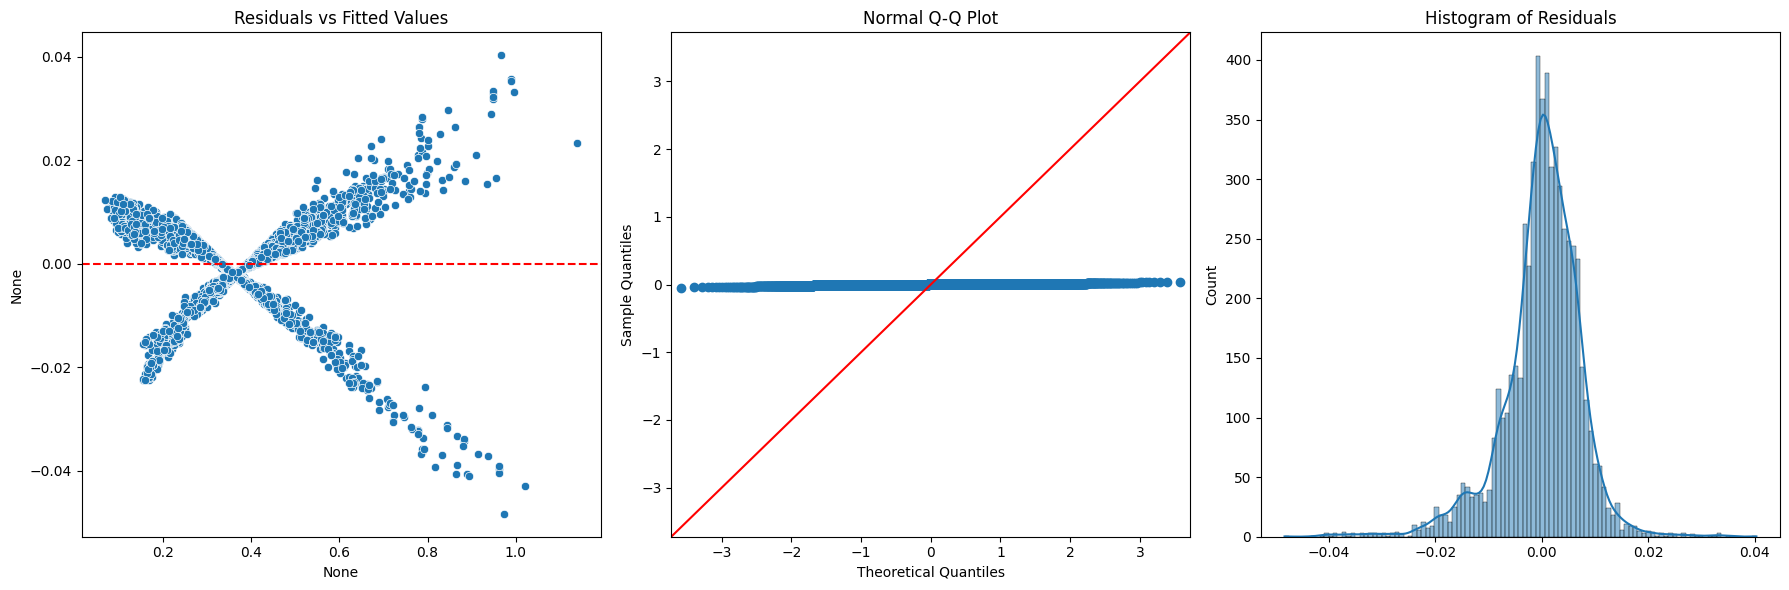

In [ ]:
best_model = model_fs

# Residual Analysis for the Best Multiple Linear Regression Model
residuals_best = best_model.resid
fitted_values_best = best_model.fittedvalues

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Residuals vs Fitted Values
sns.scatterplot(x=fitted_values_best, y=residuals_best, ax=ax[0])
ax[0].axhline(0, linestyle='--', color='red')
ax[0].set_title('Residuals vs Fitted Values')

# Normal Q-Q Plot
sm.qqplot(residuals_best, line='45', ax=ax[1])
ax[1].set_title('Normal Q-Q Plot')

# Histogram of Residuals
sns.histplot(residuals_best, kde=True, ax=ax[2])
ax[2].set_title('Histogram of Residuals')

plt.tight_layout()
plt.show()


1. **Residuals vs Fitted Values Plot**:
   - The residuals vs fitted values plot shows a distinct pattern (a funnel shape or "X" shape). This indicates non-linearity in the relationship between the predictors (weight and height) and the response variable (BMI).
   - The residuals should be randomly distributed around the horizontal line at zero if the linear model were appropriate. However, the pattern suggests heteroscedasticity (variance of residuals changing with fitted values) and that a linear model is not adequately capturing the relationship.

2. **Normal Q-Q Plot**:
   - The Q-Q plot compares the distribution of the residuals to a normal distribution. The points should lie on the red line if the residuals were normally distributed.
   - The points deviate significantly from the line, especially in the tails, indicating that the residuals are not normally distributed. This suggests that the model assumptions are violated.

3. **Histogram of Residuals**:
   - The histogram of residuals shows the distribution of residuals. Ideally, this should resemble a normal distribution (bell-shaped curve) centered at zero.
   - The histogram appears to have a peak around zero but shows skewness and kurtosis, further indicating that the residuals are not normally distributed.


The diagnostics indicate that the linear regression model is not appropriate for estimating BMI from weight and height. The non-linearity and non-normality of residuals suggest that the relationship between these variables is not well-captured by a linear model.


## G. Explained Variation in the Response Variable


To determine the percentage of variation in the response variable (BMI) explained by the models, we need to refer to the R-squared values from the respective models. The R-squared value represents the proportion of the variance in the dependent variable (BMI) that is predictable from the independent variables.



#### Model B:
- **R-squared**: 0.997
- **Adjusted R-squared**: 0.997

#### Model D:
- **R-squared**: 0.997
- **Adjusted R-squared**: 0.997

Both the comprehensive model (Part B) and the simplified model (Part D) explain 99.7% of the variation in BMI.s which confirm the model's reliability.


# 6. Logistic Regression Model and ROC Curve Analysis

We use the following variables for the model:
- **Response variable (binary categorical):** gender (Male/Female)
- **Explanatory variables:**
  - Categorical: educ, race, voter_category
  - Numerical: ppage, weight

## A: Constructing the Logistic Regression Model

### preprocessing

First, we need to preprocess the data, particularly the categorical variables which will be converted into dummy variables for the logistic regression model.

In [ ]:
data = pd.read_csv('nonvoters_data.csv')
# Preprocess the data
# Convert 'gender' to binary numeric
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

# Select relevant columns
selected_columns = ['gender', 'educ', 'race', 'voter_category', 'ppage', 'weight']
data = data[selected_columns].dropna()

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['educ', 'race', 'voter_category'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns='gender')
y = data['gender']

# Standardize numerical features
scaler = StandardScaler()
X[['ppage', 'weight']] = scaler.fit_transform(X[['ppage', 'weight']])


### fit model & log odds

In [ ]:
# Add constant to the model
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y.astype(float), X.astype(float)).fit()

# Summary of the logistic regression model
logit_summary = logit_model.summary()
print(logit_summary)

Optimization terminated successfully.
         Current function value: 0.659576
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                 5836
Model:                          Logit   Df Residuals:                     5826
Method:                           MLE   Df Model:                            9
Date:                Tue, 16 Jul 2024   Pseudo R-squ.:                 0.04839
Time:                        17:13:03   Log-Likelihood:                -3849.3
converged:                       True   LL-Null:                       -4045.0
Covariance Type:            nonrobust   LLR p-value:                 8.870e-79
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7705      0.101     -7.634      0.000   

1. **Intercept (const):**
   - The intercept is \(-0.7705\). This is the log odds of the outcome (being male) when all predictors are at their reference category or mean value.
   
2. **Slopes (coefficients):**
   - **ppage:** \(-0.3248\). For each one standard deviation increase in age, the log odds of being male decrease by 0.3248.
   - **weight:** \(-0.7161\). For each one standard deviation increase in weight, the log odds of being male decrease by 0.7161.
   - **educ_High school or less:** \(0.3442\). Individuals with high school education or less have log odds of being male that are 0.3442 higher than those with a college education.
   - **educ_Some college:** \(0.0939\). This coefficient is not statistically significant (p-value = 0.169).
   - **race_Hispanic:** \(0.3350\). Hispanics have log odds of being male that are 0.3350 higher than Blacks (reference category).
   - **race_Other/Mixed:** \(0.5460\). Individuals of other or mixed races have log odds of being male that are 0.5460 higher than Blacks.
   - **race_White:** \(0.6876\). Whites have log odds of being male that are 0.6876 higher than Blacks.
   - **voter_category_rarely/never:** \(0.2508\). Individuals who rarely or never vote have log odds of being male that are 0.2508 higher than those who always vote.
   - **voter_category_sporadic:** \(0.1347\). Sporadic voters have log odds of being male that are 0.1347 higher than those who always vote.


### log odds ratio

In [ ]:
# Calculate odds ratios and confidence intervals
odds_ratios = np.exp(logit_model.params)
conf = logit_model.conf_int()
conf['OR'] = odds_ratios
conf.columns = ['2.5%', '97.5%', 'OR']

conf

,2.5%,97.5%,OR
const,-0.968323,-0.572667,0.462784
ppage,-0.389945,-0.259642,0.722677
weight,-0.800700,-0.631509,0.488652
educ_High school or less,0.185575,0.502854,1.410882
educ_Some college,-0.039800,0.227644,1.098474
race_Hispanic,0.136144,0.533800,1.397901
race_Other/Mixed,0.285495,0.806525,1.726351
race_White,0.516096,0.859118,1.988950
voter_category_rarely/never,0.094909,0.406677,1.285044
voter_category_sporadic,0.009710,0.259614,1.144150


1. **Intercept (const):**
   - OR = 0.463. When all predictors are at their reference category or mean value, the odds of being male are about 0.463 times that of being female.

2. **Slopes (coefficients):**
   - **ppage:** OR = 0.723. For each one standard deviation increase in age, the odds of being male decrease by about 28%.
   - **weight:** OR = 0.489. For each one standard deviation increase in weight, the odds of being male decrease by about 51%.
   - **educ_High school or less:** OR = 1.411. Individuals with high school education or less have 1.411 times the odds of being male compared to those with a college education.
   - **race_Hispanic:** OR = 1.398. Hispanics have 1.398 times the odds of being male compared to Blacks.
   - **race_Other/Mixed:** OR = 1.726. Individuals of other or mixed races have 1.726 times the odds of being male compared to Blacks.
   - **race_White:** OR = 1.989. Whites have 1.989 times the odds of being male compared to Blacks.
   - **voter_category_rarely/never:** OR = 1.285. Individuals who rarely or never vote have 1.285 times the odds of being male compared to those who always vote.
   - **voter_category_sporadic:** OR = 1.144. Sporadic voters have 1.144 times the odds of being male compared to those who always vote.


## B: plot the ROC curve & calculate the AUC

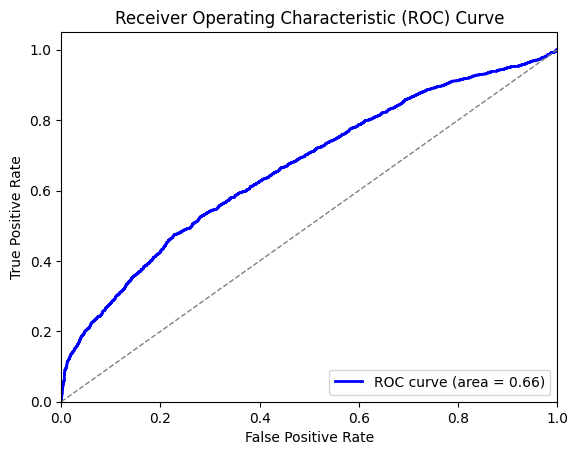

In [ ]:
# Calculate the predicted probabilities
y_pred_prob = logit_model.predict(X.astype(float))

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_auc

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) for different threshold values.

- The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between the two classes (male and female). An AUC of 0.66 indicates that the model has a good ability to distinguish between males and females, as values closer to 1.0 signify better performance.



## C: Plotting the Odds Ratio Curve for Categorical Variables


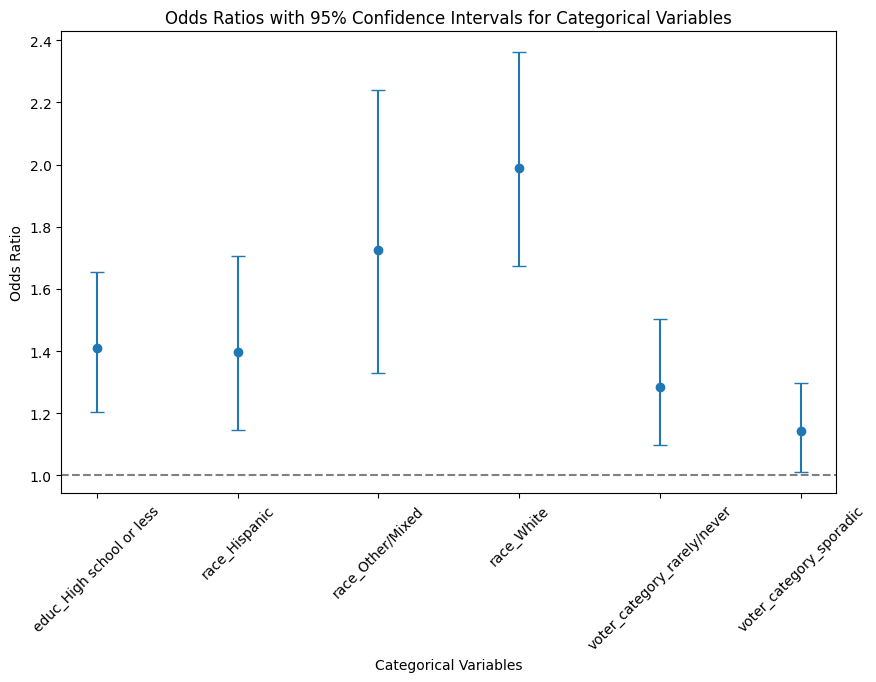

In [ ]:
# Extract odds ratios for categorical variables
categorical_vars = ['educ_High school or less', 'race_Hispanic', 'race_Other/Mixed', 'race_White',
                    'voter_category_rarely/never', 'voter_category_sporadic']

# Plotting odds ratios for categorical variables
odds_ratios_cat = odds_ratios[categorical_vars]
conf_cat = conf.loc[categorical_vars]

# Plot the odds ratios with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(odds_ratios_cat.index, odds_ratios_cat,
             yerr=[odds_ratios_cat - np.exp(conf_cat['2.5%']), np.exp(conf_cat['97.5%']) - odds_ratios_cat],
             fmt='o', capsize=5)
plt.axhline(1, linestyle='--', color='gray')
plt.xlabel('Categorical Variables')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios with 95% Confidence Intervals for Categorical Variables')
plt.xticks(rotation=45)
plt.show()


- **Educ (High school or less):** The odds ratio is approximately 1.41, indicating that individuals with a high school education or less are more likely to be male compared to those with a college education.
- **Race (Hispanic):** The odds ratio is approximately 1.40, suggesting that Hispanic individuals are more likely to be male compared to Black individuals.
- **Race (Other/Mixed):** The odds ratio is around 1.73, indicating a higher likelihood of being male for individuals of other or mixed races compared to Black individuals.
- **Race (White):** The odds ratio is about 1.99, suggesting that White individuals are more likely to be male compared to Black individuals.
- **Voter Category (Rarely/Never):** The odds ratio is approximately 1.29, indicating that individuals who rarely or never vote are more likely to be male compared to those who always vote.
- **Voter Category (Sporadic):** The odds ratio is around 1.14, indicating a slightly higher likelihood of being male for sporadic voters compared to those who always vote.


## D: Calculating 95% Confidence Interval for the Odds Ratio


In [ ]:
conf

,2.5%,97.5%,OR
const,-0.968323,-0.572667,0.462784
ppage,-0.389945,-0.259642,0.722677
weight,-0.800700,-0.631509,0.488652
educ_High school or less,0.185575,0.502854,1.410882
educ_Some college,-0.039800,0.227644,1.098474
race_Hispanic,0.136144,0.533800,1.397901
race_Other/Mixed,0.285495,0.806525,1.726351
race_White,0.516096,0.859118,1.988950
voter_category_rarely/never,0.094909,0.406677,1.285044
voter_category_sporadic,0.009710,0.259614,1.144150


We have already calculated the 95% confidence intervals for the odds ratios in the previous steps. The intervals are displayed in the `conf` DataFrame, which includes the lower and upper bounds for each variable.

- **ppage:** 0.72 (0.67, 0.77)
- **weight:** 0.49 (0.45, 0.53)
- **educ_High school or less:** 1.41 (1.20, 1.65)
- **race_Hispanic:** 1.40 (1.15, 1.71)
- **race_Other/Mixed:** 1.73 (1.33, 2.24)
- **race_White:** 1.99 (1.68, 2.36)
- **voter_category_rarely/never:** 1.29 (1.10, 1.50)
- **voter_category_sporadic:** 1.14 (1.01, 1.30)

These intervals indicate the range within which the true odds ratios are likely to fall with 95% confidence.


# 7. Evaluation and Optimization of Logistic Regression Model

## A: Most Significant Explanatory Variable


To determine which explanatory variable plays the most significant role in the prediction, we can look at the p-values and the magnitude of the coefficients (log odds) in the logistic regression model. The lower the p-value, the more significant the variable is in predicting the outcome. Additionally, the magnitude of the coefficient indicates the strength of the effect on the log odds of the outcome.

From the logistic regression model summary:
- **weight** has the smallest p-value (\( < 0.0001 \)) and a relatively large magnitude of the coefficient (\(-0.7161\)).

Thus, **weight** appears to be the most significant explanatory variable in the model. It has a substantial impact on the log odds of being male, and its p-value indicates a high level of statistical significance.

## B: OR Curve for Another Categorical Variable

### OR Curve for `educ`

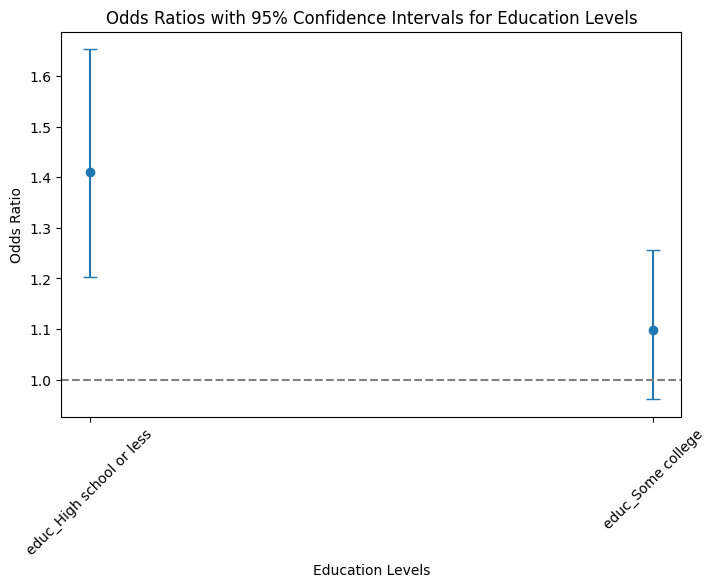

In [ ]:
# Plot the odds ratios for 'educ' variable with 95% confidence intervals

educ_vars = ['educ_High school or less', 'educ_Some college']

# Extract odds ratios and confidence intervals for 'educ' variable
odds_ratios_educ = odds_ratios[educ_vars]
conf_educ = conf.loc[educ_vars]

# Plot the odds ratios with confidence intervals for 'educ' variable
plt.figure(figsize=(8, 5))
plt.errorbar(odds_ratios_educ.index, odds_ratios_educ,
             yerr=[odds_ratios_educ - np.exp(conf_educ['2.5%']), np.exp(conf_educ['97.5%']) - odds_ratios_educ],
             fmt='o', capsize=5)
plt.axhline(1, linestyle='--', color='gray')
plt.xlabel('Education Levels')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios with 95% Confidence Intervals for Education Levels')
plt.xticks(rotation=45)
plt.show()


The plot shows the odds ratios for different education levels compared to the reference category (College education):

- **High School or Less:** The odds ratio is approximately 1.41, indicating that individuals with a high school education or less are 1.41 times more likely to be male compared to those with a college education. The confidence interval (1.20, 1.65) does not include 1, confirming statistical significance.
- **Some College:** The odds ratio is around 1.10, indicating that individuals with some college education are slightly more likely to be male compared to those with a college education. The confidence interval (0.96, 1.26) includes 1, suggesting this variable is not statistically significant.

## C: Constructing a New Logistic Regression Model with Most Meaningful Variables


From the previous analysis, the most meaningful variables are:
- **weight**
- **race (Hispanic, Other/Mixed, White)**
- **voter_category (rarely/never, sporadic)**

We construct a new logistic regression model using these variables

In [ ]:
# Select the most meaningful explanatory variables
meaningful_vars = ['weight', 'race_Hispanic', 'race_Other/Mixed', 'race_White',
                   'voter_category_rarely/never', 'voter_category_sporadic']

# Define features (X) and target (y) for the new model
X_meaningful = data[meaningful_vars]
y = data['gender']

# Standardize numerical features
X_meaningful[['weight']] = scaler.fit_transform(X_meaningful[['weight']])

# Add constant to the model
X_meaningful = sm.add_constant(X_meaningful)

# Fit logistic regression model
logit_model_meaningful = sm.Logit(y.astype(float), X_meaningful.astype(float)).fit()

# Summary of the new logistic regression model
print(logit_model_meaningful.summary())

Optimization terminated successfully.
         Current function value: 0.668040
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                 5836
Model:                          Logit   Df Residuals:                     5829
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Jul 2024   Pseudo R-squ.:                 0.03618
Time:                        17:13:04   Log-Likelihood:                -3898.7
converged:                       True   LL-Null:                       -4045.0
Covariance Type:            nonrobust   LLR p-value:                 2.971e-60
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6000      0.086     -6.979      0.000   

<ipython-input-140-84feb9f04cdc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_meaningful[['weight']] = scaler.fit_transform(X_meaningful[['weight']])


- **Intercept (const):**
  - The intercept is \(-0.6000\). This is the log odds of being male when all predictors are at their reference category or mean value.

- **Slopes (coefficients):**
  - **weight:** \(-0.5233\). For each one standard deviation increase in weight, the log odds of being male decrease by 0.5233. This variable is highly significant (\( p < 0.0001 \)).
  - **race_Hispanic:** \(0.3752\). Hispanics have log odds of being male that are 0.3752 higher than Blacks.
  - **race_Other/Mixed:** \(0.4378\). Individuals of other or mixed races have log odds of being male that are 0.4378 higher than Blacks.
  - **race_White:** \(0.5168\). Whites have log odds of being male that are 0.5168 higher than Blacks.
  - **voter_category_rarely/never:** \(0.4720\). Individuals who rarely or never vote have log odds of being male that are 0.4720 higher than those who always vote.
  - **voter_category_sporadic:** \(0.1809\). Sporadic voters have log odds of being male that are 0.1809 higher than those who always vote.

All coefficients are statistically significant, indicating that these variables meaningfully contribute to the prediction of the response variable (gender).


## D: Drawing the Utility Curve


We assign utility values:

- **True Positive (TP):** Correctly predicting male $=>1$
- **False Positive (FP):** Incorrectly predicting male $=>-1$
- **True Negative (TN):** Correctly predicting female $=>1$
- **False Negative (FN):** Incorrectly predicting female $=>-1$

$$ utility = TP - FP + TN - FN $$

we calculate the utility for different thresholds and plot the utility curve


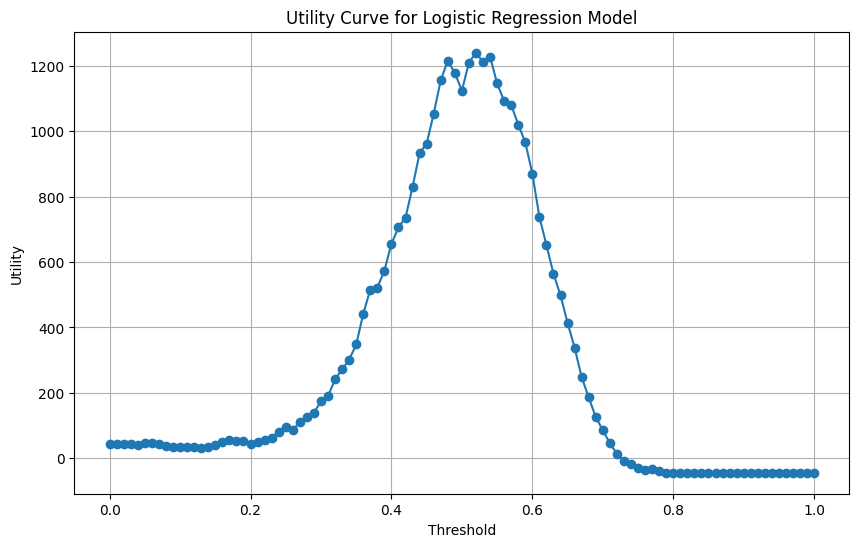

In [ ]:
# Define utility values
utility_values = {
    'TP': 1,
    'FP': -1,
    'TN': 1,
    'FN': -1
}

# Calculate predicted probabilities for the new model
y_pred_prob_meaningful = logit_model_meaningful.predict(X_meaningful.astype(float))

# Initialize lists to store utilities and thresholds
utilities = []
thresholds = np.arange(0.0, 1.01, 0.01)

# Calculate utility for each threshold
for threshold in thresholds:
    y_pred = (y_pred_prob_meaningful >= threshold).astype(int)
    TP = ((y == 1) & (y_pred == 1)).sum()
    FP = ((y == 0) & (y_pred == 1)).sum()
    TN = ((y == 0) & (y_pred == 0)).sum()
    FN = ((y == 1) & (y_pred == 0)).sum()
    utility = (TP * utility_values['TP']) + (FP * utility_values['FP']) + (TN * utility_values['TN']) + (FN * utility_values['FN'])
    utilities.append(utility)

# Plot the utility curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, utilities, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Utility')
plt.title('Utility Curve for Logistic Regression Model')
plt.grid(True)
plt.show()


In [ ]:
# Find the best threshold
best_threshold = thresholds[np.argmax(utilities)]
best_utility = max(utilities)
best_threshold, best_utility

(0.52, 1240)


The utility curve represents the total utility for different threshold values used to classify the predictions. The best threshold is the one that maximizes the utility.

- **Best Threshold:** 0.52
- **Best Utility:** 1240

At a threshold of 0.52, the model achieves the highest utility, indicating this threshold provides the best balance between true positives and false positives/negatives based on the defined utility values.
